In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get data

In [43]:
tau_folder_new = 'D:\\isttc\\results\\allen_mice\\dataset\\cut_30min\\tau_binned\\'
tau_folder_old = 'D:\\isttc\\results\\allen_mice\\z\\binned_pearson\\'
tau_trials = 'D:\\isttc\\results\\allen_mice\\dataset\\cut_30min\\'

In [46]:
tau_new_df = pd.read_pickle(tau_folder_new + 'tau_acf_binned_acf_50_20.pkl')
print(f'tau new len {len(tau_new_df)}')

tau_old_df = pd.read_pickle(tau_folder_old + 'tau_bsl_sua_pearson_50ms_20lags_df.pkl')
print(f'tau old len {len(tau_old_df)}')

tau_trials_df = pd.read_pickle(tau_trials + 'trials_50_50_1000ms.pkl')
print(f'tau trials len {len(tau_trials_df)}')

tau new len 18168
tau old len 18168
tau trials len 5


In [47]:
tau_trials_df

,unit_id,pearsonr_avg_trial_med,sttc_avg_trial_med,sttc_concat_trial_med
0,950911624,4.791159502348274,4.457160665455588,4.140946491862589
1,950911641,4.45148813422519,4.466593576987956,4.343132125946251
2,950911686,34.792039117047494,37.84248669363868,3.8596129259673893
3,950911657,3.951573508951852,3.9787533145849387,15.901931241943274
4,950911696,256.2120128088667,367.09576552431884,507.14239622948946


In [48]:
# merge
tau_new_df.rename(columns={'specimen_id': 'animal_id'}, inplace=True)
tau_new_df.head(5)

,animal_id,session_id,unit_id,area_id,acf_0,acf_1,acf_2,acf_3,acf_4,acf_5,...,acf_13,acf_14,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20,tau_ms,r_squared
0,744912849,766640955,950911624,MB,1.0,0.143022,0.223343,0.209290,0.189455,0.184463,...,0.155179,0.151403,0.143317,0.139357,0.149616,0.130958,0.142431,0.137882,3.864438,0.039105
1,744912849,766640955,950911641,MB,1.0,0.199614,0.288799,0.282684,0.266711,0.258102,...,0.241255,0.232576,0.240838,0.226970,0.234421,0.229139,0.234876,0.220968,3.745150,0.268645
2,744912849,766640955,950911686,MB,1.0,-0.320400,-0.129030,0.118703,-0.013674,-0.035476,...,-0.000724,0.000907,0.005389,0.014960,-0.002629,-0.001766,0.014756,0.003070,34.668211,0.825903
3,744912849,766640955,950911657,MB,1.0,-0.393755,0.072082,0.036701,-0.013059,0.020486,...,0.005182,0.003387,0.010748,0.001063,0.005979,0.003851,0.012545,-0.001140,3.388431,0.965243
4,744912849,766640955,950911696,MB,1.0,0.536237,0.432557,0.357824,0.306088,0.293106,...,0.167495,0.161414,0.151834,0.147743,0.148564,0.141471,0.136865,0.131202,243.395433,0.983469


In [5]:
tau_old_df.keys()

Index(['animal_id', 'session_id', 'unit_id', 'area_id', 'fr_hz', 'rec_length',
       'acf', 'acf_decay_1_4', 'popt', 'pcov', 'r_squared', 'tau', 'tau_ms',
       'acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7',
       'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14',
       'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20', 'popt_0',
       'popt_1', 'popt_2', 'acf_fit_failed', 'rec_length_ms'],
      dtype='object')

In [6]:
tau_merged_df = tau_old_df.merge(tau_new_df, on='unit_id', how='left', suffixes=('_old', '_new'))
tau_merged_df.keys()

Index(['animal_id_old', 'session_id_old', 'unit_id', 'area_id_old', 'fr_hz',
       'rec_length', 'acf', 'acf_decay_1_4', 'popt', 'pcov', 'r_squared_old',
       'tau', 'tau_ms_old', 'acf_0_old', 'acf_1_old', 'acf_2_old', 'acf_3_old',
       'acf_4_old', 'acf_5_old', 'acf_6_old', 'acf_7_old', 'acf_8_old',
       'acf_9_old', 'acf_10_old', 'acf_11_old', 'acf_12_old', 'acf_13_old',
       'acf_14_old', 'acf_15_old', 'acf_16_old', 'acf_17_old', 'acf_18_old',
       'acf_19_old', 'acf_20_old', 'popt_0', 'popt_1', 'popt_2',
       'acf_fit_failed', 'rec_length_ms', 'animal_id_new', 'session_id_new',
       'area_id_new', 'acf_0_new', 'acf_1_new', 'acf_2_new', 'acf_3_new',
       'acf_4_new', 'acf_5_new', 'acf_6_new', 'acf_7_new', 'acf_8_new',
       'acf_9_new', 'acf_10_new', 'acf_11_new', 'acf_12_new', 'acf_13_new',
       'acf_14_new', 'acf_15_new', 'acf_16_new', 'acf_17_new', 'acf_18_new',
       'acf_19_new', 'acf_20_new', 'tau_ms_new', 'r_squared_new'],
      dtype='object')

### Plots

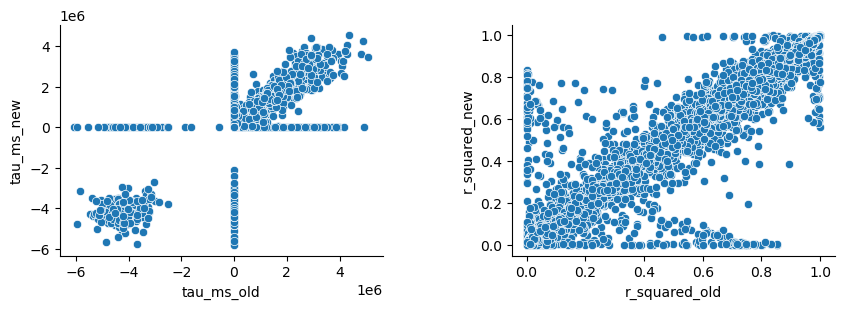

In [7]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x='tau_ms_old', y='tau_ms_new', data=tau_merged_df)
sns.scatterplot(ax=axes[1], x='r_squared_old', y='r_squared_new', data=tau_merged_df)

sns.despine()

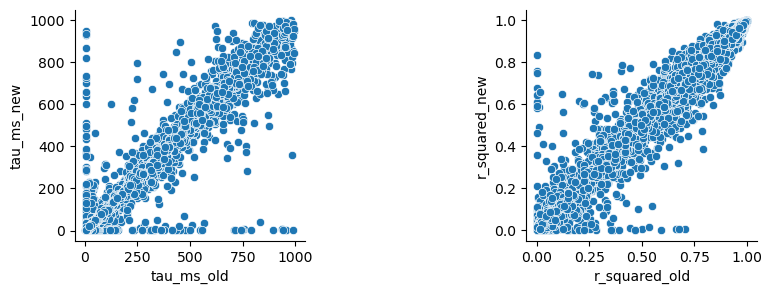

In [9]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x='tau_ms_old', y='tau_ms_new', 
                data=tau_merged_df.query('tau_ms_old <= 1000 and tau_ms_old > 0 and tau_ms_new <= 1000 and tau_ms_new > 0').copy())
sns.scatterplot(ax=axes[1], x='r_squared_old', y='r_squared_new', 
                data=tau_merged_df.query('tau_ms_old <= 1000 and tau_ms_old > 0 and tau_ms_new <= 1000 and tau_ms_new > 0').copy())

axes[0].set_aspect('equal', adjustable='box')
axes[1].set_aspect('equal', adjustable='box')

sns.despine()

In [10]:
tau_merged_df['area_id_new'].unique()

array(['MB', 'APN', 'NOT', 'CA1', 'VISam', 'TH', 'LP', 'DG', 'VISmma',
       'VISp', 'CA3', 'VISl', 'VPM', 'LGd', 'VISal', 'VISrl', 'PO',
       'VISpm', 'MGd', 'SGN', 'ProS', 'SUB', 'VISli', 'LT', 'MRN', 'Eth',
       'POL', 'CA2', 'MGm', 'MGv', 'PPT', 'ZI', 'IntG', 'IGL', 'OP',
       'VIS', 'SCig', 'LGv', 'PRE', 'POST', 'HPF', 'SCiw', 'VISmmp',
       'grey', 'LD', 'PIL', 'RT', 'SCop', 'SCsg'], dtype=object)

In [32]:
rudelt_areas_query = 'area_id_new == "VISp" or area_id_new == "VISl" or area_id_new == "VISal" or area_id_new == "VISrl" or area_id_new == "VISam" or area_id_new == "VISpm"'
hp_areas_query = 'area_id_new == "CA1" or area_id_new == "CA2" or area_id_new == "CA3" or area_id_new == "DG" or area_id_new == "SUB"'
tau_0_1000_query = 'tau_ms_old <= 1000 and tau_ms_old > 0 and tau_ms_new <= 1000 and tau_ms_new > 0'

In [39]:
tau_0_1000_df =  tau_merged_df.query(tau_0_1000_query + ' and r_squared_new > 0.7 and r_squared_old > 0.7').copy()

C:\Users\ipoch\AppData\Local\Temp\ipykernel_5552\92646664.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(ax=axes[2], x='area_id_new', y='tau_ms_new',


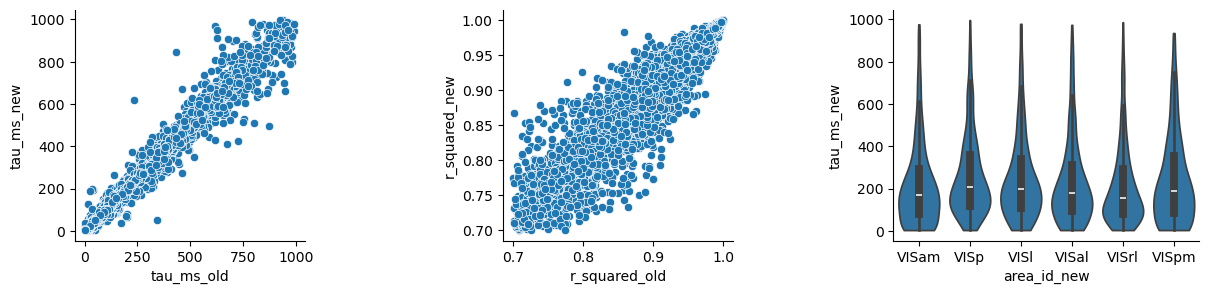

In [41]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x='tau_ms_old', y='tau_ms_new', 
                data=tau_0_1000_df.query(rudelt_areas_query + ' or ' + hp_areas_query).copy())
sns.scatterplot(ax=axes[1], x='r_squared_old', y='r_squared_new', 
                data=tau_0_1000_df.query(rudelt_areas_query + ' or ' + hp_areas_query).copy())

sns.violinplot(ax=axes[2], x='area_id_new', y='tau_ms_new', 
                data=tau_0_1000_df.query(rudelt_areas_query).copy(), cut=0,  scale='width')
#axes[2].set_yscale('log')

axes[0].set_aspect('equal', adjustable='box')
axes[1].set_aspect('equal', adjustable='box')

sns.despine()